先增加维度，达到过拟合
PolynomialFeatures()‘多项式特征’功能的作用是按照多项式的方式增加数据特征的维度。如果是单维度数据，将生成其指数函数，如果是多维数据，除了生成各个维度的指数函数之外，可以指定是否要生成交叉相乘的数值。
PolynomialFeatures()返回的是一个类似于‘计算器’的实例，通过传入多项式的指数次数，和是否要偏置，是否要交叉等参数，可以生成一个‘计算器’。然后通过调用fit_transform将数字传入到这个计算器中,可以生成按照规矩产生的新数据。

标准化，将数据的均值和标准差处理成符合正态分布。符合正态分布的数据抗干扰的能力更强。
StandardScaler()标准化包含均值归0和方差归1两个操作，可以根据需求只选择其中一个。

然后通过正则化控制过拟合。
岭回归：通过L2正则化的方式控制过拟合，拟合结果为曲线
LASSO回归：通过L1正则化的方式控制过拟合，拟合结果为斜线

网格搜索/随机搜索+交叉验证法+学习曲线/验证曲线
确定一些超参数的合适取值

网格搜索
以列表的形式把所有可能的参数都记录下来，然后迭代尝试每一组参数的结果
随机搜索
按一定的间隔将参数分成多个不同的参数空间，在每个参数空间内随机选取数据，参与模型训练
学习曲线：寻找不会导致过拟合的训练数据数量
横轴为参与训练的数据量，纵轴为训练数据和验证数据的准确率对比
验证曲线
横轴为某个超参数的值，纵轴为训练数据和验证数据的准确率对比

In [20]:
#数据探索：去掉元素数据中的异常数据

#数据探索：去掉训练和测试数据中特征分布重合度差的特征

#数据探索：将数据最大最小值归一化（或者标准化）

#特征工程：将与目标相关性小于0.1的特征剔除

#特征工程：数据PCA降维，减少数据之间的相关度

'''
以上内容前面已完成，以下为本文件主要内容

'''
#模型验证：增维保证拟合。数据维度低容易欠拟合，多项式特征可以增维，但是增加的维度多了会导致过拟合，需要选择恰当的指数进行增维

#模型验证：正则化进一步防止过拟合。L2或者L1或者两者结合的elastic
#岭回归和LASSO回归的结合体，带惩罚项和损失函数，通过梯度来进行优化的线性回归模型，L2/L1/elastic可选，损失函数可选，一次只训练一个数据

#模型验证：超参数探索
#对超参数进行模型的交叉验证    
#通过绘制学习曲线和验证曲线盘判断超参数的效果

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import sklearn.pipeline as pipline 

#### 导入数据

In [3]:
train_data = pd.read_csv('zhengqi_train_change_feat.txt',sep='\t')
test_data = pd.read_csv('zhengqi_test_change_feat.txt',sep='\t')


In [4]:
train_data

,NEW_V0,NEW_V1,NEW_V2,NEW_V3,NEW_V4,NEW_V5,NEW_V6,NEW_V7,NEW_V8,NEW_V9,NEW_V10,NEW_V11,NEW_V12,target
0,0.244155,0.058371,-0.709365,0.112128,0.045604,0.398246,-0.049281,-0.406480,0.091026,-0.114354,-0.064594,0.017555,-0.066695,0.175
1,0.072612,0.020445,-0.466664,0.103140,0.133513,-0.155133,0.056603,-0.108923,0.156555,-0.127921,-0.095539,-0.065958,-0.076677,0.676
2,0.050654,-0.064795,-0.384084,0.195353,0.090190,-0.242254,0.053519,-0.123022,0.119945,-0.188390,-0.058773,-0.076811,-0.093144,0.633
3,0.145182,-0.086517,-0.430886,0.184700,0.073053,-0.230179,0.041645,-0.070297,0.034805,-0.052809,-0.049796,-0.063461,-0.071294,0.206
4,0.094822,0.002961,-0.363128,0.181108,0.035590,-0.131888,-0.156308,-0.017808,0.023301,-0.085829,-0.033165,-0.107697,-0.080723,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,-0.185775,0.163135,0.296266,0.044703,-0.160500,0.073577,0.013890,-0.022500,0.063700,-0.019435,-0.156600,0.089789,0.038696,0.235
2872,-0.265113,0.116245,0.148075,0.014564,-0.175116,0.217206,-0.116328,0.036270,0.102399,-0.047176,-0.064027,0.065101,0.124267,1.042
2873,-0.004994,0.235932,0.390053,-0.047434,-0.138841,0.046352,0.058589,-0.114935,0.041735,-0.006045,-0.100510,0.040572,0.050761,0.005
2874,-0.017451,0.250202,0.271764,-0.106539,-0.209788,0.121608,-0.150202,-0.056429,-0.011848,0.010349,-0.094184,-0.032955,0.004018,0.350


In [5]:
test_data

,NEW_V0,NEW_V1,NEW_V2,NEW_V3,NEW_V4,NEW_V5,NEW_V6,NEW_V7,NEW_V8,NEW_V9,NEW_V10,NEW_V11,NEW_V12
0,-0.129435,0.220144,0.173392,-0.049063,-0.167287,0.162341,-0.064637,0.059213,0.046759,0.003083,-0.124581,-0.026677,0.037020
1,-0.123219,0.179696,0.164898,-0.122726,-0.200217,0.141890,0.002490,0.003623,0.063826,-0.012343,-0.165080,-0.068530,-0.040966
2,-0.043112,0.173744,0.304921,-0.065651,-0.126573,0.060515,0.025053,-0.013048,0.076173,-0.055109,-0.172516,-0.050138,-0.012723
3,0.133995,-0.071889,0.036736,0.009561,-0.173597,0.040159,-0.153504,0.039500,0.010562,0.082007,-0.104190,-0.060490,-0.026506
4,0.051896,-0.183454,-0.009253,-0.036562,-0.159347,0.046709,0.018447,-0.001529,0.086025,0.015957,-0.125173,-0.066865,0.007095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1.244274,1.334998,-0.446095,0.255675,0.172921,0.281019,0.438704,-0.202064,0.662915,-0.147001,-0.339486,-0.048955,-0.017032
1921,1.652199,1.350769,-0.342764,-0.138860,0.043813,0.123960,0.260642,-0.609137,0.414461,-0.171882,-0.186591,0.004330,-0.183495
1922,1.671803,1.013052,-0.376791,-0.075557,0.038611,-0.016727,0.203187,-0.558380,0.392438,0.061784,-0.241721,0.052381,-0.283655
1923,1.592421,0.923634,-0.276922,-0.157805,0.051790,0.034208,0.093629,-0.507366,0.210369,0.030047,-0.219187,-0.063489,-0.292368


In [6]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NEW_V0   2876 non-null   float64
 1   NEW_V1   2876 non-null   float64
 2   NEW_V2   2876 non-null   float64
 3   NEW_V3   2876 non-null   float64
 4   NEW_V4   2876 non-null   float64
 5   NEW_V5   2876 non-null   float64
 6   NEW_V6   2876 non-null   float64
 7   NEW_V7   2876 non-null   float64
 8   NEW_V8   2876 non-null   float64
 9   NEW_V9   2876 non-null   float64
 10  NEW_V10  2876 non-null   float64
 11  NEW_V11  2876 non-null   float64
 12  NEW_V12  2876 non-null   float64
 13  target   2876 non-null   float64
dtypes: float64(14)
memory usage: 314.7 KB


,NEW_V0,NEW_V1,NEW_V2,NEW_V3,NEW_V4,NEW_V5,NEW_V6,NEW_V7,NEW_V8,NEW_V9,NEW_V10,NEW_V11,NEW_V12,target
count,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2.876000e+03,2876.000000
mean,2.964712e-17,-3.952950e-17,1.087061e-16,1.235297e-17,-4.941187e-17,3.644126e-17,5.805895e-17,8.894137e-17,-1.111767e-17,4.694128e-17,5.744130e-17,9.202961e-17,-5.867660e-17,0.135369
std,3.840477e-01,3.423395e-01,2.045193e-01,1.977184e-01,1.658767e-01,1.470211e-01,1.395414e-01,1.296748e-01,1.199321e-01,1.124867e-01,9.798109e-02,9.185801e-02,8.159365e-02,0.974719
min,-9.320095e-01,-8.379270e-01,-7.916021e-01,-7.065682e-01,-4.452660e-01,-5.941737e-01,-5.294757e-01,-4.674043e-01,-5.319106e-01,-4.753778e-01,-3.790984e-01,-3.239929e-01,-3.323403e-01,-3.044000
25%,-2.537384e-01,-2.545326e-01,-1.279173e-01,-1.278624e-01,-1.212082e-01,-8.601164e-02,-8.800741e-02,-7.751555e-02,-6.920176e-02,-7.002890e-02,-6.463466e-02,-6.013841e-02,-4.610755e-02,-0.337500
50%,-2.886601e-02,-1.893454e-02,-3.005211e-03,-1.292484e-02,-2.360626e-03,-1.006842e-03,3.503217e-03,4.656405e-03,-3.556689e-03,2.269871e-03,-4.420134e-03,-5.581793e-03,-1.066703e-03,0.317500
75%,1.947556e-01,2.311176e-01,1.233665e-01,1.057083e-01,1.111454e-01,8.561013e-02,8.394014e-02,7.817342e-02,6.719792e-02,7.208353e-02,5.881801e-02,5.394899e-02,4.550663e-02,0.796250
max,1.701455e+00,1.344978e+00,9.169933e-01,9.554204e-01,8.762068e-01,8.601535e-01,7.014691e-01,5.801701e-01,6.022486e-01,4.825051e-01,4.363522e-01,4.172200e-01,4.653403e-01,2.538000


In [7]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NEW_V0   1925 non-null   float64
 1   NEW_V1   1925 non-null   float64
 2   NEW_V2   1925 non-null   float64
 3   NEW_V3   1925 non-null   float64
 4   NEW_V4   1925 non-null   float64
 5   NEW_V5   1925 non-null   float64
 6   NEW_V6   1925 non-null   float64
 7   NEW_V7   1925 non-null   float64
 8   NEW_V8   1925 non-null   float64
 9   NEW_V9   1925 non-null   float64
 10  NEW_V10  1925 non-null   float64
 11  NEW_V11  1925 non-null   float64
 12  NEW_V12  1925 non-null   float64
dtypes: float64(13)
memory usage: 195.6 KB


,NEW_V0,NEW_V1,NEW_V2,NEW_V3,NEW_V4,NEW_V5,NEW_V6,NEW_V7,NEW_V8,NEW_V9,NEW_V10,NEW_V11,NEW_V12
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.222079,0.113842,0.053091,0.100529,-0.029422,-0.009831,-0.033908,-0.067553,0.090161,-0.002329,-0.097080,0.050927,-0.011320
std,0.440435,0.394326,0.226035,0.201455,0.136767,0.174084,0.187338,0.183249,0.140758,0.108559,0.132473,0.119844,0.093207
min,-0.817579,-0.698686,-0.899932,-0.538406,-0.376166,-0.750652,-0.523293,-0.735503,-0.333599,-0.403685,-0.485764,-0.275542,-0.419198
25%,-0.080192,-0.180944,-0.079988,-0.023985,-0.122929,-0.116350,-0.160761,-0.159905,-0.000708,-0.074028,-0.186577,-0.035681,-0.065495
50%,0.155154,0.048990,0.056380,0.080293,-0.045241,-0.012834,-0.048607,-0.046694,0.078649,-0.011714,-0.093929,0.039703,-0.007592
75%,0.442406,0.366894,0.186943,0.205966,0.040287,0.090207,0.072055,0.040712,0.178162,0.066801,-0.005935,0.128929,0.042041
max,2.149280,1.774280,0.915223,0.960794,0.695334,0.773066,1.029240,0.597300,0.662915,0.381681,0.340326,0.427325,0.399589


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 2181 to 2120
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NEW_V0   2300 non-null   float64
 1   NEW_V1   2300 non-null   float64
 2   NEW_V2   2300 non-null   float64
 3   NEW_V3   2300 non-null   float64
 4   NEW_V4   2300 non-null   float64
 5   NEW_V5   2300 non-null   float64
 6   NEW_V6   2300 non-null   float64
 7   NEW_V7   2300 non-null   float64
 8   NEW_V8   2300 non-null   float64
 9   NEW_V9   2300 non-null   float64
 10  NEW_V10  2300 non-null   float64
 11  NEW_V11  2300 non-null   float64
 12  NEW_V12  2300 non-null   float64
dtypes: float64(13)
memory usage: 251.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 2181 to 2120
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  2300 non-null   float64
dtypes: float64(1)
memory usage: 35.9 KB
<class 'pandas.c

#### 判断使用多少数据比例的数据进行训练比较合适

C:\Users\Administrator\AppData\Local\Temp/ipykernel_13500/4041011660.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


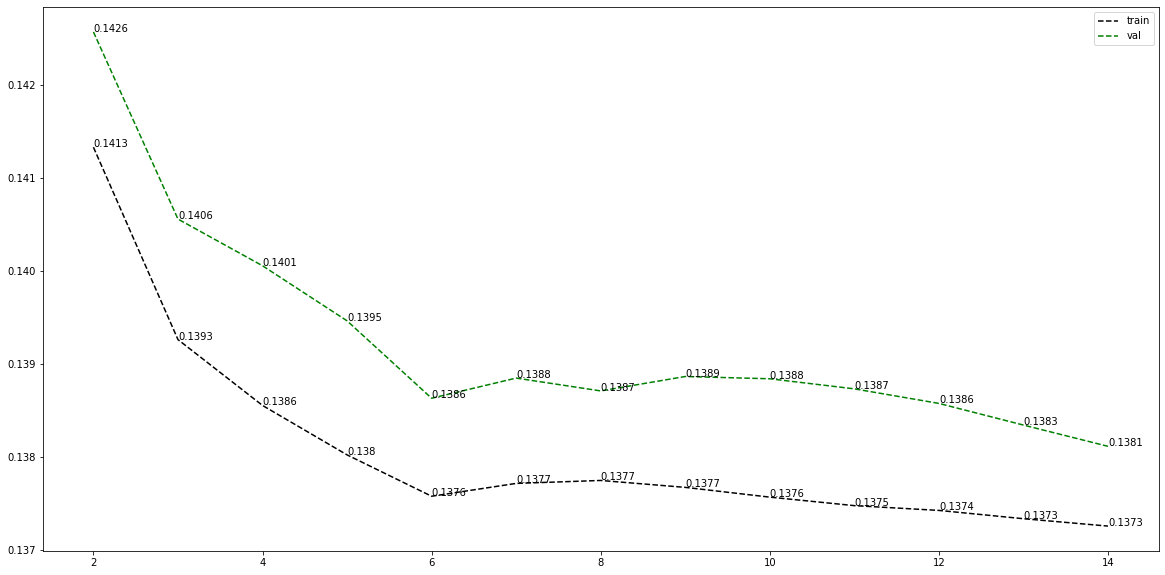

In [75]:
'''
通过绘制学习曲线,使用交叉验证K折验证法
'''

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

mse_train_list=[]
mse_val_list=[]

#K代表了将数据分成几份，其中的一份用于验证，其他的份数用于训练
for k in range(2,15):
    mean_mse_train = 0
    mean_mse_val = 0
    kf = KFold(n_splits=k,shuffle=True)
    for train_index,val_index in kf.split(train_data):
        train_feat = train_data.drop('target',axis=1).iloc[train_index]
        train_target = train_data['target'].iloc[train_index]
        val_feat = train_data.drop('target',axis=1).iloc[val_index]
        val_target = train_data['target'].iloc[val_index]

        poly = PolynomialFeatures(degree=1,include_bias=False)
        train_feat_poly = poly.fit_transform(train_feat)
        val_feat_poly = poly.transform(val_feat)

        SGD_model = SGDRegressor(max_iter=500,tol=0.001)
        SGD_model.fit(train_feat_poly,train_target)


        mean_mse_train += mean_squared_error(train_target,SGD_model.predict(train_feat_poly))/k
        mean_mse_val += mean_squared_error(val_target,SGD_model.predict(val_feat_poly))/k

    mse_train_list.append(mean_mse_train)
    mse_val_list.append(mean_mse_val)

fig1 = plt.figure(figsize=(20,10))
plt.plot([k for k in range(2,15)],mse_train_list,'k--',label='train',)
plt.plot([k for k in range(2,15)],mse_val_list,'g--',label='val')
plt.legend()
for k,value in enumerate(mse_train_list):
    plt.text(k+2,value,str(value.round(4)))
for k,value in enumerate(mse_val_list):
    plt.text(k+2,value,str(value.round(4)))
fig1.show()

#### 可以看到，在K=6之后，损失下降的幅度就很小了，交叉验证的损失率基本上不再大幅降低，此时训练和验证数据的比例相当于是85%：15%≈5:1，即训练数据约85%或者80%时，损失率比较低。再增大训练的数据量，损失没有较大的提升，此时会增加过拟合的可能

#### 下面判断数据是否需要对数据进行多项式特征增维

C:\Users\Administrator\AppData\Local\Temp/ipykernel_13500/4227736697.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


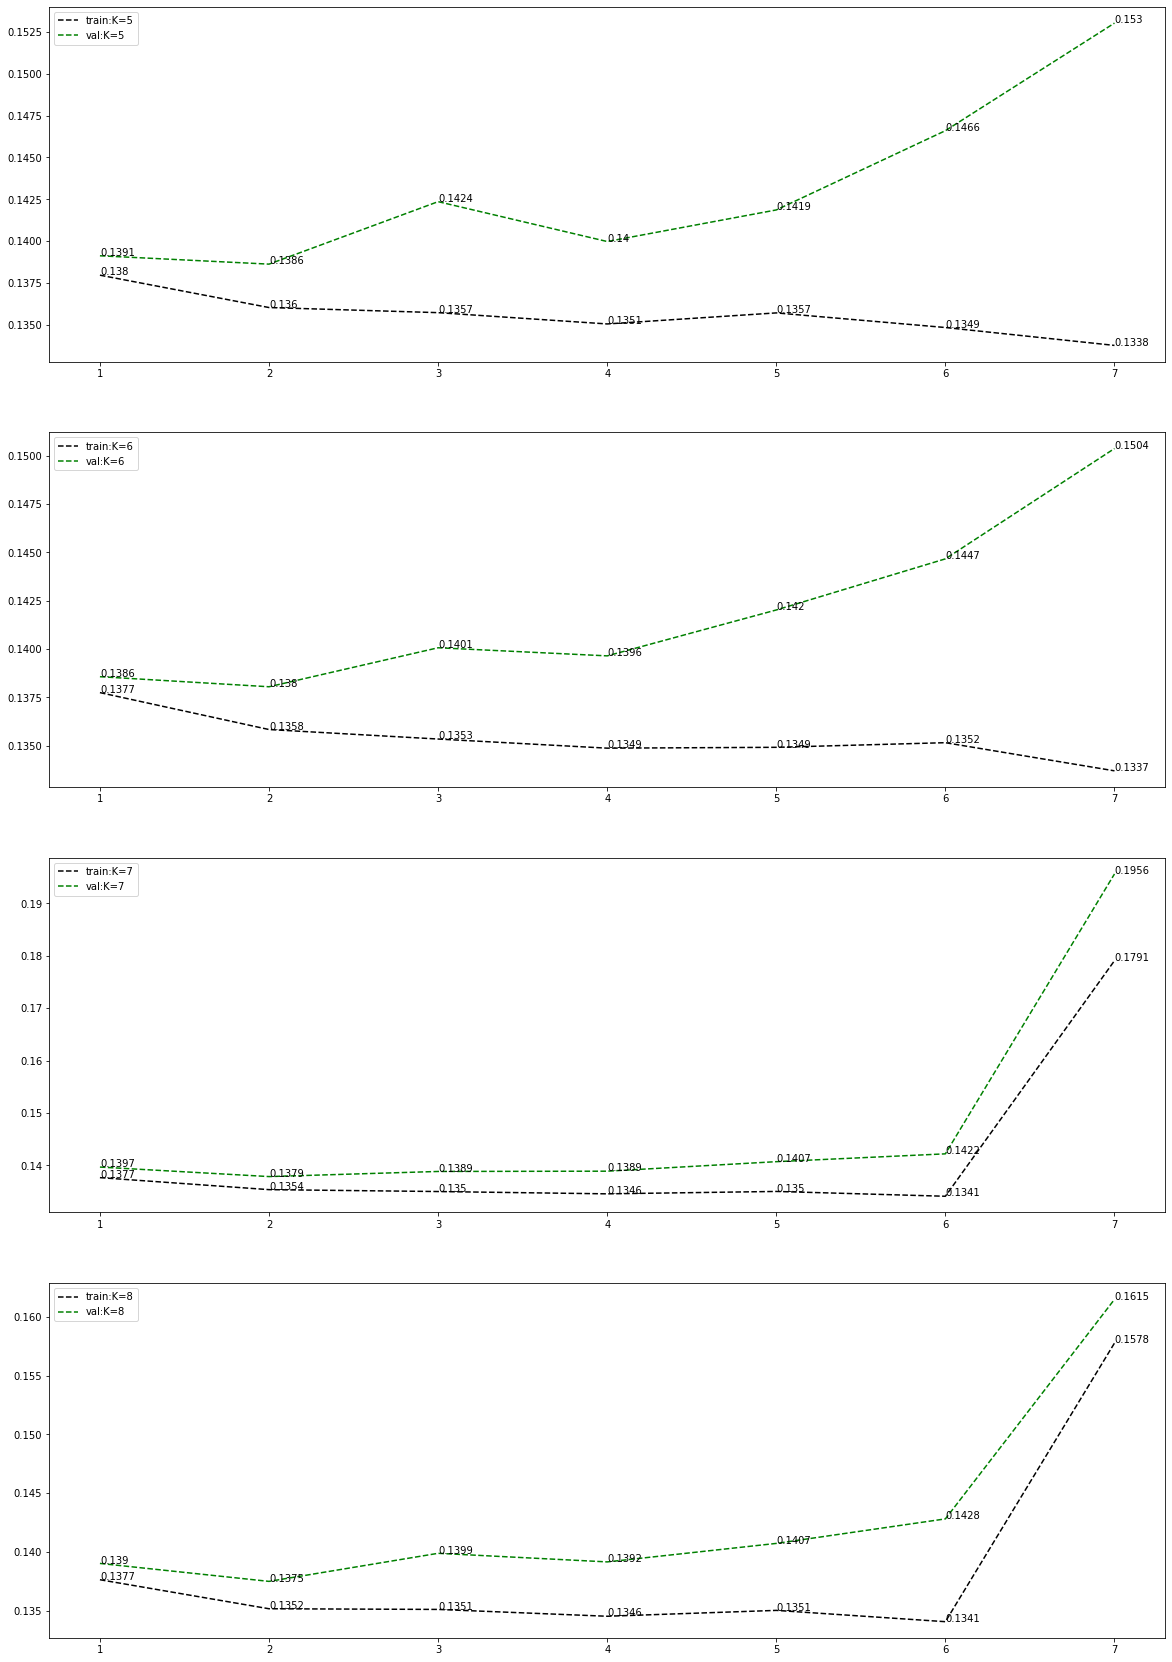

In [79]:
'''
模型用SGDRegressor,数据转换用多项式特征，测试用K折交叉验证

'''
fig2 = plt.figure(figsize=(20,30))

#根据上面的测试，这里直接将K的范围固定在5,6,7,8三个数值之间
for k in range(5,9):
    mean_mse_train_list = []
    mean_mse_val_list = []
    for d in range(1,8):  #将多项式特征增维范围控制在1-7之间
        mean_mse_train=0
        mean_mse_val=0
        kf = KFold(n_splits=k,shuffle=True)
        for train_index,val_index in kf.split(train_data):
            train_feat = train_data.drop('target',axis=1).iloc[train_index]
            train_target = train_data['target'].iloc[train_index]
            val_feat = train_data.drop('target',axis=1).iloc[val_index]
            val_target = train_data['target'].iloc[val_index]

            poly = PolynomialFeatures(degree=d,include_bias=False)
            train_feat_poly = poly.fit_transform(train_feat)
            val_feat_poly = poly.transform(val_feat)

            SGD_model = SGDRegressor(max_iter=500,tol=0.001)
            SGD_model.fit(train_feat_poly,train_target)


            mean_mse_train += mean_squared_error(train_target,SGD_model.predict(train_feat_poly))/k
            mean_mse_val += mean_squared_error(val_target,SGD_model.predict(val_feat_poly))/k
        
        mean_mse_val_list.append(mean_mse_val)
        mean_mse_train_list.append(mean_mse_train)

    plt.subplot(4,1,k-4)
    plt.plot([d for d in range(1,8)],mean_mse_train_list,'k--',label='train:'+'K='+str(k))
    plt.plot([d for d in range(1,8)],mean_mse_val_list,'g--',label='val:'+'K='+str(k))
    plt.legend()
    for k,value in enumerate(mean_mse_train_list):
        plt.text(k+1,value,str(value.round(4)))
    for k,value in enumerate(mean_mse_val_list):
        plt.text(k+1,value,str(value.round(4)))
        
fig2.show()

#### 当K=5,6,7,8时，将多项式特征的参数设置为2时，其损失都是同折下最低的，所以从一定角度来说，对原始数据进行二项式转化，能有效的降低损失，也就是把之前的a变成$a^2$

#### 接下来对模型使用正则化参数，观察不同正则化参数的效果

C:\Users\Administrator\AppData\Local\Temp/ipykernel_13500/4072821995.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


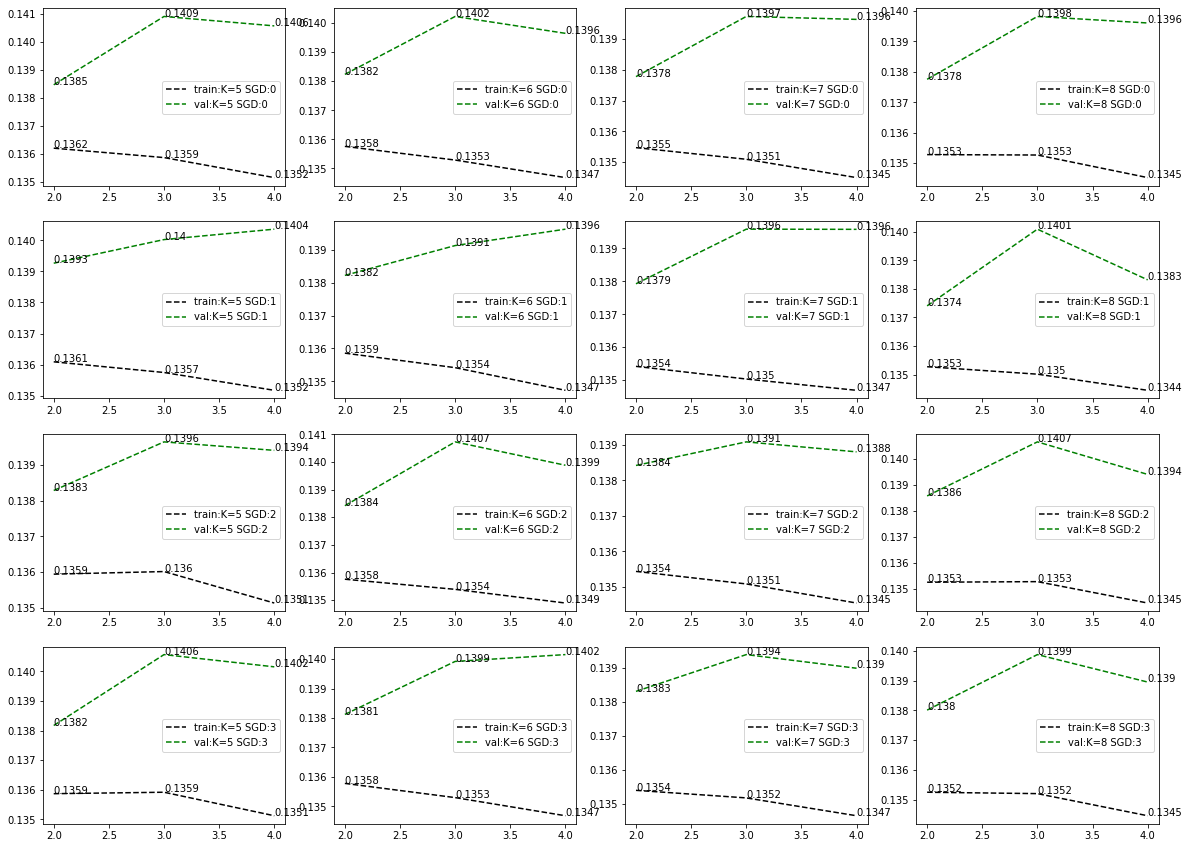

In [94]:
'''
模型用SGDRegressor,数据转换用多项式特征（控制在2,3,4），测试用K折交叉验证，正则化分别尝试用L1，L2，以及elastic

'''
fig3 = plt.figure(figsize=(20,15))

SGD_model_list = [SGDRegressor(max_iter=1000,tol=0.001,penalty='l2',alpha=0),
                  SGDRegressor(max_iter=1000,tol=0.001,penalty='l2',alpha=0.0001),
                  SGDRegressor(max_iter=1000,tol=0.001,penalty='l1',alpha=0.00001),
                  SGDRegressor(max_iter=1000,tol=0.001,penalty='elasticnet',l1_ratio=0.9,alpha=0.00001)]

for n,SGD_model in enumerate(SGD_model_list):
#根据上面的测试，这里直接将K的范围固定在5,6,7,8三个数值之间
    for k in range(5,9):
        mean_mse_train_list = []
        mean_mse_val_list = []
        for d in range(2,5):  #将多项式特征增维范围控制在2,3,4之间
            mean_mse_train=0
            mean_mse_val=0
            kf = KFold(n_splits=k,shuffle=True)
            for train_index,val_index in kf.split(train_data):
                train_feat = train_data.drop('target',axis=1).iloc[train_index]
                train_target = train_data['target'].iloc[train_index]
                val_feat = train_data.drop('target',axis=1).iloc[val_index]
                val_target = train_data['target'].iloc[val_index]

                poly = PolynomialFeatures(degree=d,include_bias=False)
                train_feat_poly = poly.fit_transform(train_feat)
                val_feat_poly = poly.transform(val_feat)

                SGD_model = SGDRegressor(max_iter=500,tol=0.001)
                SGD_model.fit(train_feat_poly,train_target)


                mean_mse_train += mean_squared_error(train_target,SGD_model.predict(train_feat_poly))/k
                mean_mse_val += mean_squared_error(val_target,SGD_model.predict(val_feat_poly))/k

            mean_mse_val_list.append(mean_mse_val)
            mean_mse_train_list.append(mean_mse_train)

        plt.subplot(4,4,4*n+k-4)
        plt.plot([d for d in range(2,5)],mean_mse_train_list,'k--',label='train:'+'K='+str(k)+' '+'SGD:'+str(n))
        plt.plot([d for d in range(2,5)],mean_mse_val_list,'g--',label='val:'+'K='+str(k)+' '+'SGD:'+str(n))
        plt.legend()
        for k,value in enumerate(mean_mse_train_list):
            plt.text(k+2,value,str(value.round(4)))
        for k,value in enumerate(mean_mse_val_list):
            plt.text(k+2,value,str(value.round(4)))
        
fig3.show()

#### 第一行数据是没有进行正则化的数据，从以上数据看来，正则化的作用不大。

In [95]:
#使用K=6，多项式特征取2，惩罚选elastic来生成模型
kf = KFold(n_splits=6,shuffle=True)

final_model_list = []
mse_list = []
poly_model_list = []

for n,(train_index,val_index) in enumerate(kf.split(train_data)):
    train_feat = train_data.drop('target',axis=1).iloc[train_index]
    train_target = train_data['target'].iloc[train_index]
    val_feat = train_data.drop('target',axis=1).iloc[val_index]
    val_target = train_data['target'].iloc[val_index]
    finial_model=SGDRegressor(max_iter=2000,tol=0.001,penalty='elasticnet',l1_ratio=0.9,alpha=0.00001)
    
    poly = PolynomialFeatures(degree=2)
    poly_train_feat = poly.fit_transform(train_feat)
    poly_val_feat = poly.transform(val_feat)
    
    finial_model.fit(poly_train_feat,train_target)
    final_mse=mean_squared_error(val_target,finial_model.predict(poly_val_feat))
    
    final_model_list.append(finial_model)
    mse_list.append(final_mse)
    poly_model_list.append(poly)
    
    print(f'第{n}折：损失',final_mse)

第0折：损失 0.15327932367049313
第1折：损失 0.13403678770506874
第2折：损失 0.14343325272792062
第3折：损失 0.14157462590367353
第4折：损失 0.12504145425972713
第5折：损失 0.13552162008974458


#### 从结果可以看到，第4折的模型的表现较好，因此选用第4折的模型作为最终预测的模型

In [96]:
#用第四折的模型进行test_data的预测
poly_test_data = poly_model_list[4].transform(test_data)
predicts = final_model_list[4].predict(poly_test_data)
np.savetxt('predictions.txt',predicts,delimiter='\t')
print('down')

down


#### 使用了多项式转换和正则化，但是模型换成了SGDRegressor，成绩反而降低了

日期:2022-09-13 18:30:13
score:0.5068
提交说明：进行了二项式的转换，使用了elastic正则化，以及SGDRegressor

#### 分别使用线性模型和书中推荐的lgb模型，对test_data进行预测并提交了结果，结果从0.4567→0.3745，结果提升不大，更换模型的作用比较有限

日期:2022-09-09 16:14:06   
score:0.3745    
提交说明：以[-6.1,6]为范围去掉异常值，进行特征工程处理，PCA降维保留13个特征，用lgb模型预测结果

日期:2022-09-09 15:11:18   
score:0.4567    
提交说明：以[-6.1,6]为范围去掉异常值，进行特征工程处理，PCA降维保留13个特征，用linear模型预测结果

日期:2022-09-06 12:17:11   
score:3.3491     
提交说明：直接用线性模型预测结果